# <h1 align="center">Mudanças Climáticas com Python</h1> 

In [1]:
#%pip install pandas

In [2]:
import pandas as pd

df_clima = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

df_clima.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df_clima.shape

(577462, 4)

In [4]:
df_clima.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [5]:
df_clima

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [6]:
# Informação sobre o tipo de dados
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [7]:
# Descrição sobre o conjunto de dados
df_clima.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


## Checando Valores Nulos

In [8]:
#%pip install missingno

<Axes: >

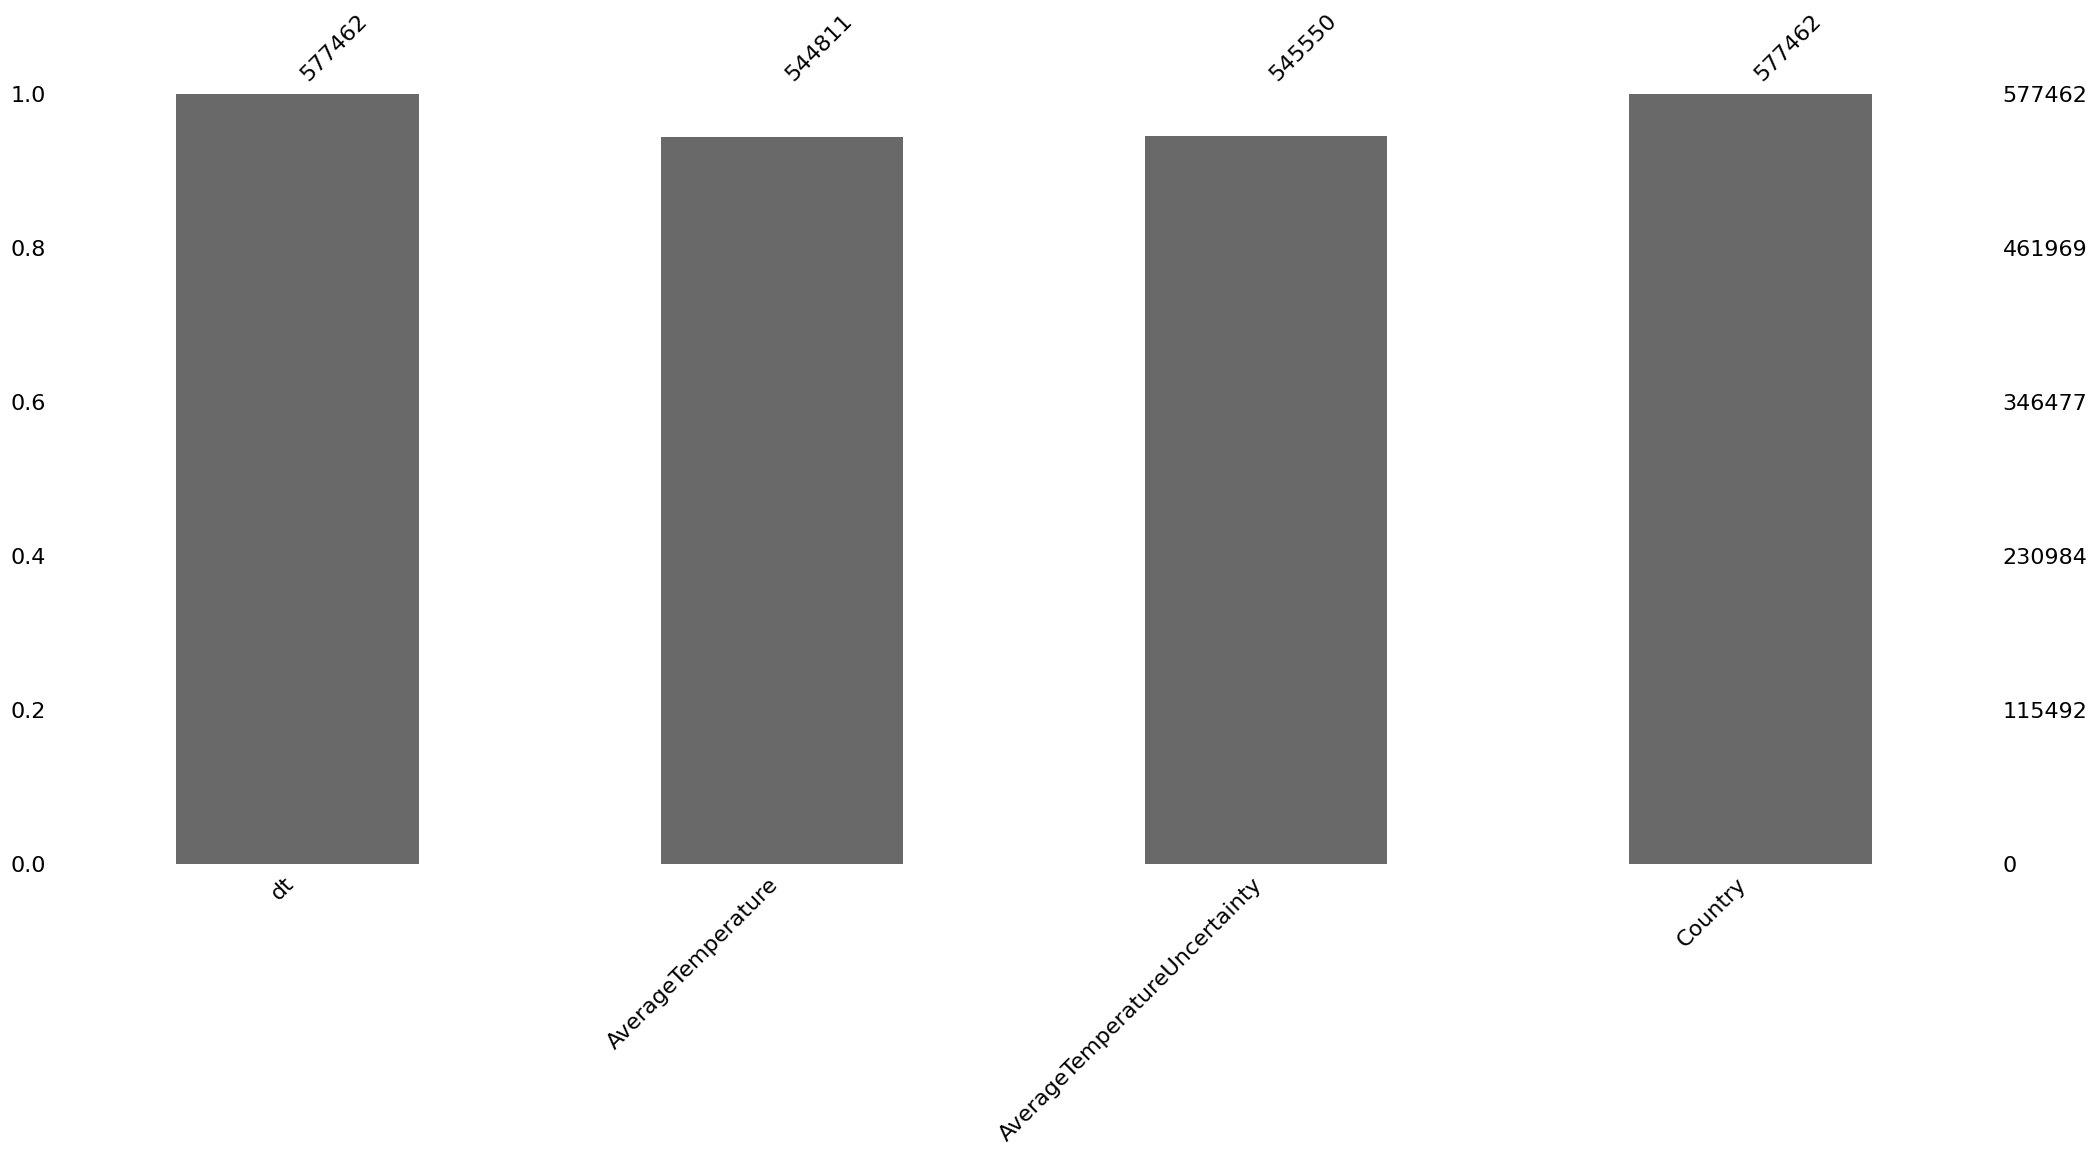

In [9]:
# Observando a quantidades de valore nulos
import missingno as msno
msno.bar(df_clima)

In [10]:
# Somando valores nulos
df_clima.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [11]:
# Removendo valores NaN do dataframe
df_clima = df_clima.dropna(how='any', axis=0)

df_clima.shape

(544811, 4)

<Axes: >

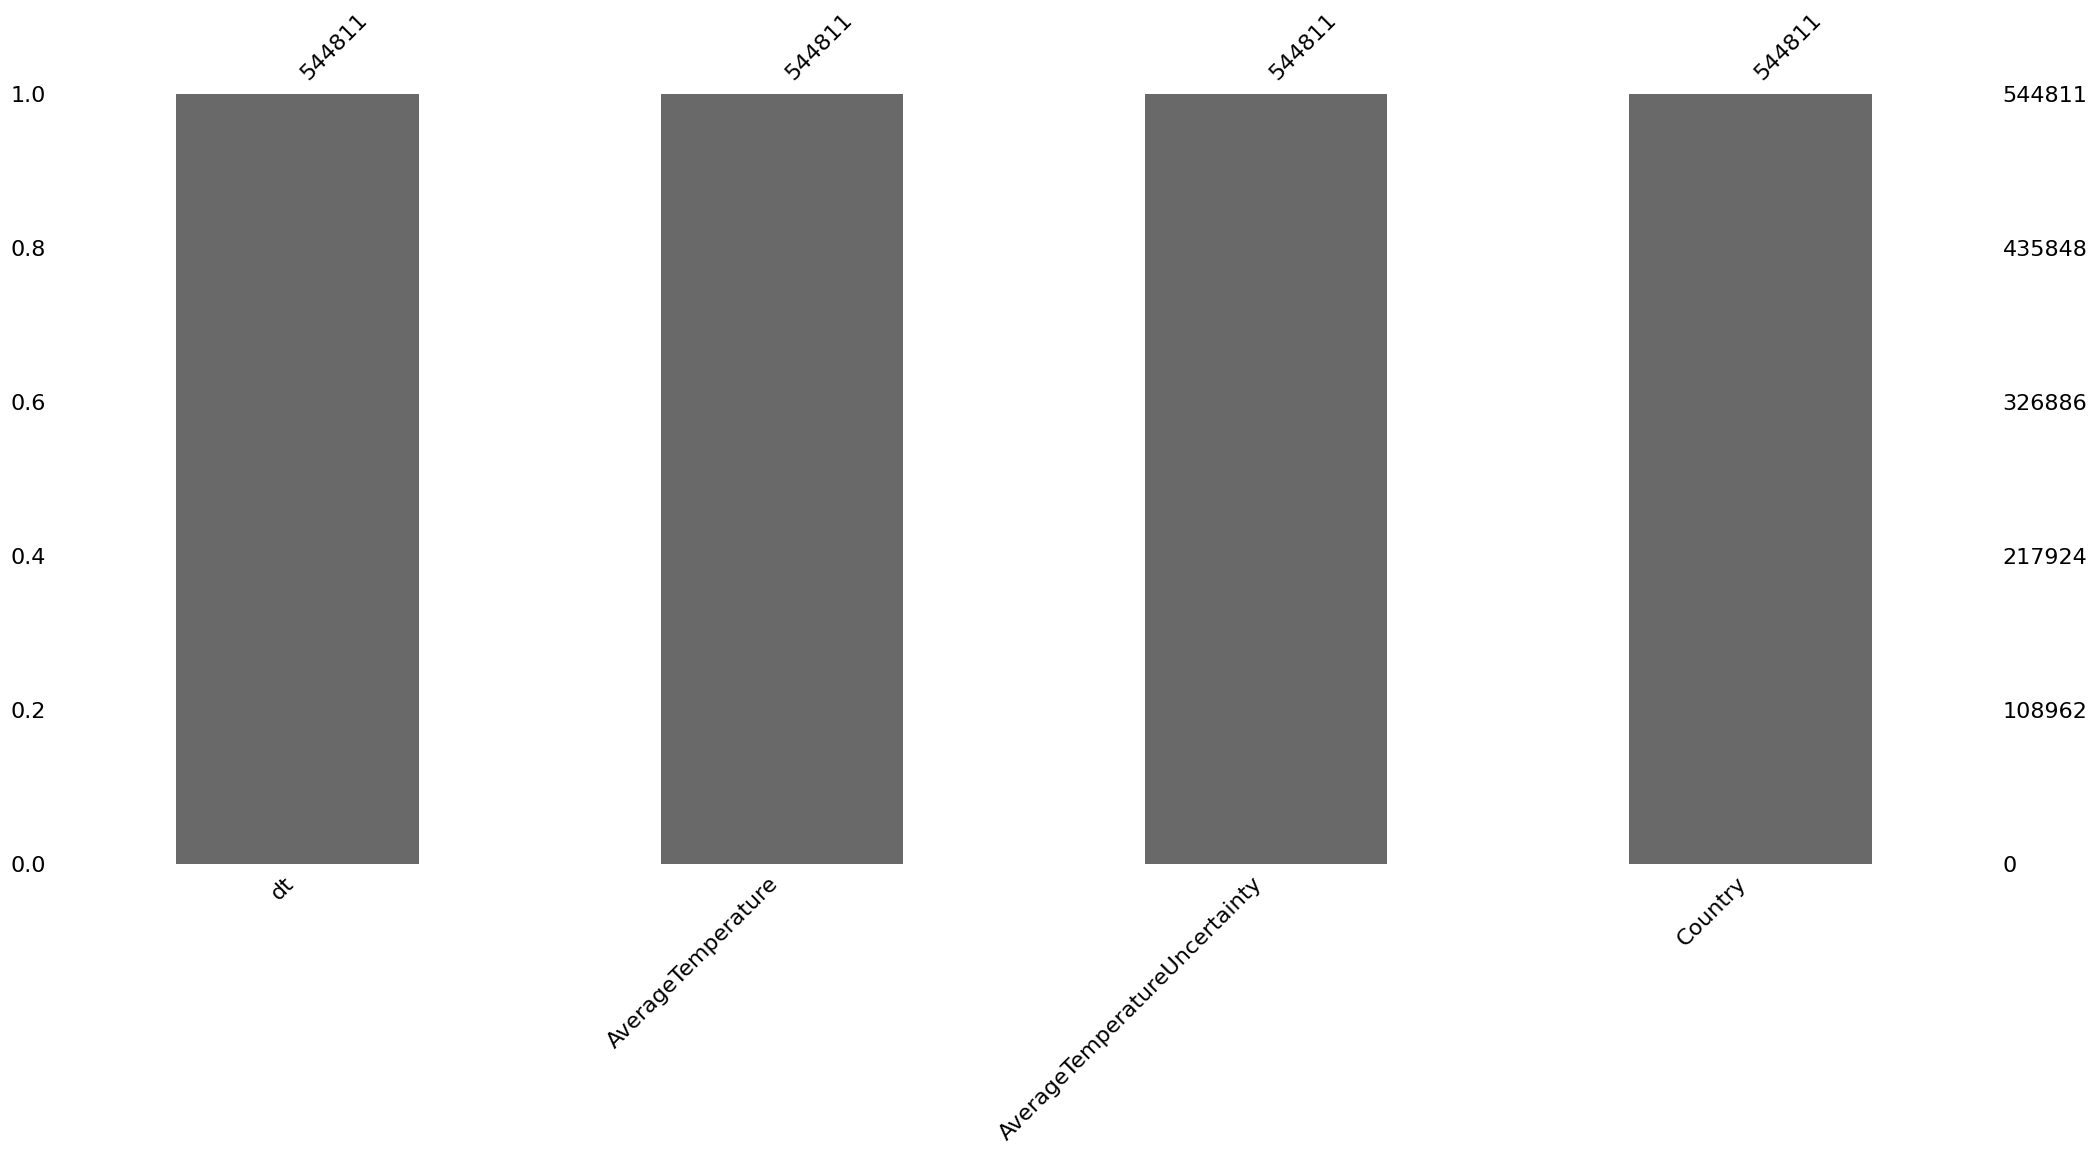

In [12]:
msno.bar(df_clima)
#sem dados perdidos, depois de apagar os dados 'nan'

## Análise de Dados Exploratória

Existe algum aquecimento global?

Em primeiro lugar, separamos o ano da coluna de data

In [25]:
df_clima['dt'][0].split('-')[0]

'1743'

In [26]:
def fetch_year(date):
    return date.split('-')[0]

In [30]:
#%pip install seaborn

In [31]:
%pip install plotly.express  

     |████████████████████████████████| 233 kB 729 kB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 179 kB/s  eta 0:00:01   |██████████▉                     | 5.2 MB 7.5 MB/s eta 0:00:02
     |████████████████████████████████| 9.9 MB 13.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
df_clima['years']=df_clima['dt'].apply(fetch_year)